## Calculation of the size of the fundamental Gauss mode, TEM00, inside a stable resonator. 

See: "Lasers", A.E. Siegman, Chapter 19.

based on the matlab version from: Fred van Goor, 7-8-2008 

adapted by: Hans Kanger, sept 2019

In [1]:
from IPython.display import HTML
HTML('''
        <style>
                .prompt{display: None;}
                
                .output_wrapper button.btn.btn-default,
                .output_wrapper .ui-dialog-titlebar {display: none;} <!-- hide toolbars and buttons of the plot -->
                
        </style>
        <script>
                code_show=true; 
                function code_toggle() 
                {
                     if (code_show)
                     {
                         $('div.input').hide();
                     } else
                     {
                         $('div.input').show();
                     }
                     code_show = !code_show
                } 
                $( document ).ready(code_toggle);
        </script>
        The raw code for this IPython notebook is by default hidden for easier reading.
        To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.
        ''')

If we define the so-called g-parameters as:

$$ g_1 = 1 - \frac{L}{R_1} $$
$$ g_2 = 1 - \frac{L}{R_2} $$

it can be shown that the laser is stable if:

$$ 0 < g_1 g_2 < 1 $$

This condition can be visualized bij plotting $g_2$ versus $g_1$ and shading the region that satisfies the above condition. In the code below this plot is generated and a dot is plotted for the present situation (given the values of $L$ and $R_1$ and $R_2$ as specified above)

If the laser is stable we can proceed with calculating the beam waist along the cavity. The definition of the parameters is shown in the figure below:

<div>
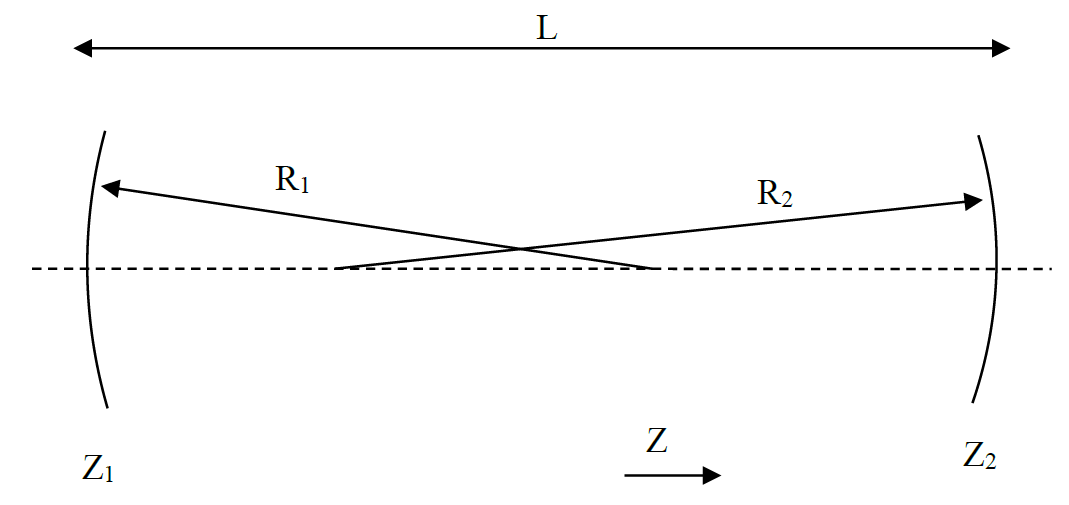
</div>

The mirrors are positioned at $z_1$ and $z_2$ and are seperated by a distance $L$. When a Gaussian beam propagates in the $z$ direction from its waist at $z=0$ to a point $z$, it can be shown that the radius of its wavefront is given by:

$$ R(z) = z + \frac{z^2_R}{z} $$

Where $z_R$ is the Rayleigh range (see Hecht: 13.1.3). Note that at the beam waist the radius is infinite (plane wave).

In a resonator with two mirrors positioned at $z=z_1$ and $z=z_2$ respectively, the radii of the
wavefronts at the mirrors must be equal to the radii of curvatures, $R_1$ and $R_2$ respectively, of the
mirrors. The size of the beam inside the resonator can thus be found by solving:

$$ R(z_1) = z_1 + \frac{z^2_R}{z_1} = -R_1 $$
$$ R(z_2) = z_2 + \frac{z^2_R}{z_2} = R_2 $$
$$ L = z_2 - z_1 $$


The above equations can be solved to find:

The Rayleigh range (distance over which the cross-sectional area of the beam doubles) is given by:

$$ z^2_R = \frac{g_1g_2(1-g_1g_2)}{(g_1+g_2-2g_1g_2)^2}L^2$$

and the positions of the two mirrors are given by:

$$ z_1 = \frac{g_2(1-g_1)}{(g_1+g_2-2g_1g_2)^2}L $$
$$ z_2 = \frac{g_1(1-g_2)}{(g_1+g_2-2g_1g_2)^2}L $$

The beam waist at $z=0$ is given by:

$$ w_0 = \frac{\lambda z_R}{\pi} $$

The beam waist at the mirror postions are given by:

$$ w^2_1 = \frac{L\lambda}{\pi}\sqrt{\frac{g_2}{g_1(1-g_1g_2)}} $$
$$ w^2_2 = \frac{L\lambda}{\pi}\sqrt{\frac{g_1}{g_2(1-g_1g_2)}} $$



The beam size as function of the position $z$ can now be evaluated (see Hecht 13.1.3 Equation 13.17 with $z_R$ substituted):

$$ w = w_0 \sqrt{1+\left( \frac{z}{z_R} \right)^2} $$

This expression is evaluated below (right plot).

<IPython.core.display.Javascript object>


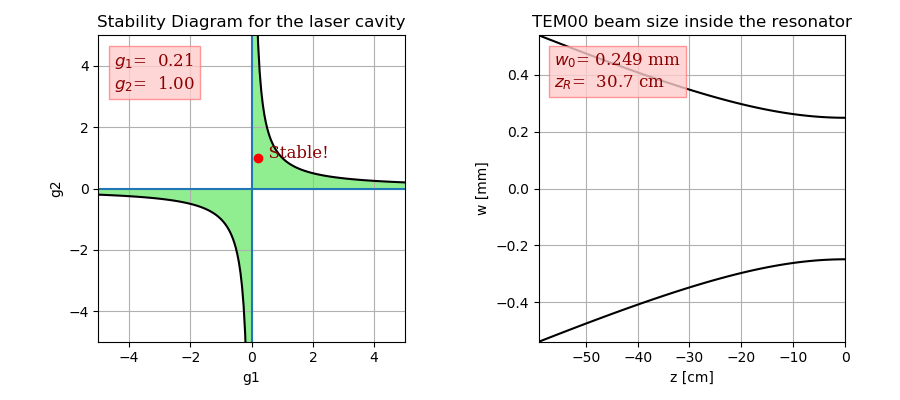

interactive(children=(FloatSlider(value=120.0, continuous_update=False, description='$L$  [cm]', layout=Layout…

In [3]:
%matplotlib notebook
# importing required modules
import numpy as np
import matplotlib.pyplot as plt
from numpy import sqrt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Definition of units and constants
m = 1.
mm = 1.E-3*m
cm = 1.E-2*m
micron = 1.E-6*m
s = 1.
c = 2.9979E8*m/s          # velocity of light in vacuum  

# Specification of cavity properties
wavelength = 0.6328*micron     # laser wavelength (HeNe laser)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4))
font = {'family': 'serif',
            'color':  'darkred',
            'weight': 'normal',
            'size': 12,
            }
bbox = dict(boxstyle="square",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   alpha = 0.8 
                   )
  

#plotting stability diagram:
ax1.set_aspect('equal', 'box')
ax1.set_title('Stability Diagram for the laser cavity')
lim_max = 5
lim_min = 0.01
x = np.linspace(lim_min , lim_max, 100)
y = 1/x
ax1.plot(x, y, 'k')
ax1.plot(-x, -y, 'k')
ax1.axis('square')
ax1.set_xlim(-lim_max, lim_max)
ax1.set_ylim(-lim_max, lim_max)
ax1.axhline(y=0)
ax1.axvline(x=0)
ax1.grid()
ax1.set_xlabel('g1')
ax1.set_ylabel('g2')
ax1.fill_between(x, x*0, y, facecolor = 'lightgreen')
ax1.fill_between(-x, x*0, -y, facecolor = 'lightgreen')
dot, = ax1.plot([0], [2], 'ro')
text = ax1.text(-3, 3.5, '  Stable!', fontdict=font)
text_g = ax1.text(0.05, 0.95, 'g1=\ng2=', fontdict=font, bbox=bbox, horizontalalignment='left',verticalalignment='top',\
                  transform=ax1.transAxes\
                 )


# creating a plot of beam size versus position z in the cavity
ax2.set_title('TEM00 beam size inside the resonator')
line2, = ax2.plot([], [], 'k')
line3, = ax2.plot([], [], 'k')
ax2.set_xlabel('z [cm]')
ax2.set_ylabel('w [mm]')
ax2.grid()
xlim = ax2.get_xbound()
ylim = ax2.get_ybound()
ax2.set_aspect((ylim[0]-ylim[1])/(xlim[0]-xlim[1]))
text_beam = ax2.text(0.05, 0.95, 'w0=\nzR=', fontdict=font, bbox=bbox, horizontalalignment='left',verticalalignment='top',\
                  transform=ax2.transAxes)

plt.tight_layout()
plt.show()

def Laser(L, R1, R2, R1_type, R2_type):
    
    
    # resonator g-parameters:               
    L = L*cm    # resonator length (adjusted by slider)
    if R1_type=='concave (+)':        
        g1 = 1. - L/(R1*cm)
    elif R1_type=='convex (-)':
        g1 = 1. + L/(R1*cm)
    else:
        g1 = 1  # radius is infinite
    
    if R2_type=='concave (+)':        
        g2 = 1. - L/(R2*cm)
    elif R2_type=='convex (-)':
        g2 = 1. + L/(R2*cm)
    else:
        g2 = 1  # radius is infinite
        
    # update the marker in the stability plot    
    dot.set_data([g1],[g2])
    text.set_position((g1, g2))
    text_g.set_text(f'$g_1$={g1:6.2f}\n$g_2$={g2:6.2f}')

    
    
    # evaluating stability
    if not(0 < g1*g2 < 1):
        text.set_text('  Not stable!')
        text_beam.set_text(f'$w_0$= - \n$z_R$= -')
        line2.set_data([],[])
        line3.set_data([], [])    

    else:
        text.set_text('  Stable!')
        # calculating beam parameters
        zR = sqrt(abs(g1*g2*(1.-g1*g2)/((g1+g2-2.*g1*g2)**2)))*L     # Rayleigh range
        w0 = sqrt(wavelength*zR/np.pi)                               # Beam size at waist at z=0 
        z1 = -g2*(1.-g1)*L/(g1+g2-2.*g1*g2)                          # position of mirror M1     
        z2 = g1*(1.-g2)*L/(g1+g2-2.*g1*g2)                           # position of mirror M2     
        w1 = sqrt(wavelength*L/np.pi*sqrt(abs(g2/(g1*(1.-g1*g2)))))  # Beam size at mirror M1    
        w2 = sqrt(wavelength*L/np.pi*sqrt(abs(g1/(g2*(1.-g1*g2)))))  # Beam size at mirror M2
        
        # creating data for the plot
        N = 100                                                     # number of points for the plot
        z = np.linspace(z1, z2, N)                                  # positions to be evaluated 
        w = w0*sqrt(1+(z/zR)**2)                                    # calculating the size of the beam at the positions z
        
        # updating plot of beam size versus position z in the cavity
        line2.set_data(z/cm, w/mm)
        line3.set_data(z/cm, -w/mm)
        ylim = np.max(w/mm)
        ax2.set_ylim(-ylim, ylim)
        ax2.set_xlim(z1/cm, z2/cm)
        xlim = ax2.get_xbound()
        ylim = ax2.get_ybound()
        ax2.set_aspect((xlim[0]-xlim[1])/(ylim[0]-ylim[1]))
        text_beam.set_text(f'$w_0$={w0/mm:6.3f} mm\n$z_R$={zR/cm:6.1f} cm')
   
    return None

# sliders for L, R1 and R2:
w=interact(Laser,
           R1_type = widgets.Dropdown(style={'description_width':'initial'}, description='Select mirror type $R_1$', 
                                      options=['concave (+)','convex (-)','plane/infinity'],value='concave (+)', continuous_update=False),
           R2_type = widgets.Dropdown(style={'description_width':'initial'}, description='Select mirror type $R_2$', 
                                      options=['concave (+)','convex (-)','plane/infinity'],value='concave (+)', continuous_update=False),
           L = widgets.FloatSlider(layout={'width': 'initial'}, style={'description_width': 'initial'},\
                                   description='$L$  [cm]', min=10.0, max=200.0, step=1.0, value=120.0, continuous_update=False),
           R1= widgets.FloatSlider(layout={'width': 'initial'}, style={'description_width': 'initial'},\
                                   description='Absolute radius $|R_1|$ [cm]', min=10, max=100.0, step=1.0, value=75.0, continuous_update=False),
           R2= widgets.FloatSlider(layout={'width': 'initial'}, style={'description_width': 'initial'},\
                                   description='Absolute radius $|R_2|$ [cm]', min=10, max=100.0, step=1.0, value=50.0, continuous_update=False),
          );